# Logisitic regression in Python with Scikit-learn
Click the image below to read the post online.

<a href='https://www.machinelearningnuggets.com/logistic-regression/'><img src='https://drive.google.com/uc?export=view&id=1U9BYq32ayJj5OTr6nEMpelmNcW_xSiAu'>


Logistic regression estimates the probability of something occurring, like 'will buy' or 'will not buy,' based on a dataset of independent variables.

Logistic regression fits an 'S'-shaped logistic function(Sigmoid function)

## Sigmoid function

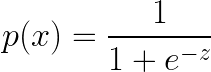


* **p(x)** is the predicted probability that the output for a given 𝐱 is equal to 1.
* **z** is the linear function since logistic regression is a linear classifier which translates to:
    * **z = b₀ + b₁x₁ + ... + bᵣxᵣ**
Where:
        * **b₀**, **b₁** ...**bᵣ** are the model's **predicted weights** or **coefficients**.
        * **x** the feature values.


* Z is the log-odds
* The odds mean the probability of success over the probability of failure.

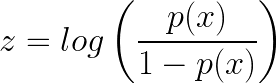

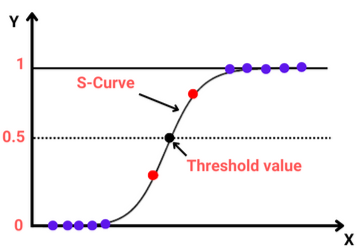

## Maximum Likelihood Estimation(MLE)

Linear regression uses the MLE to estimate predictions.

image.png

* We maximize the log-likelihood function (LLF) to get the best coefficients or the predicted weights. This involves finding the best fit sigmoid curve that provides the optimal coefficients.
* While 𝑦ᵢ = 0, the LLF for that observation is equal to log(1-p(𝐱ᵢ)), and if 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 0, the log(1-p(𝐱ᵢ)) is close to 0. The main goal is to maximize the LLF. So If 𝑝(𝐱ᵢ) is distant from 0, then the log(1-p(𝐱ᵢ)) drops significantly, and that's not what we want.

## Types of Logistic regression
* Multinomial logistic regression
* Ordinal logistic regression

# Implementing LogisticRegression Model

Data in use is [Social Network Ads](https://www.kaggle.com/datasets/rakeshrau/social-network-ads) dataset from [Kaggle]((https://www.kaggle.com)

## Import necessary packages, functions and classes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Load Dataset

In [ ]:
social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


### Exploratory Data Analysis




Check missing values

In [ ]:
social_N_data.isnull().any()

# No missing values

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

Total number of those who purchased and those who did not purchase:

Plots done with [Seaborn](https://www.machinelearningnuggets.com/seaborn-tutorial/)

In [ ]:
sns.set(rc={"figure.figsize":(9, 5)})
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

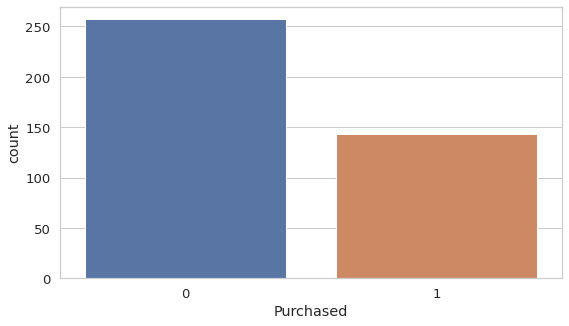

In [ ]:
sns.countplot(x='Purchased', data=social_N_data)

* Zero indicates those who did not purchase, and 1 for those who purchased.

Check for how many males and females purchased the product:

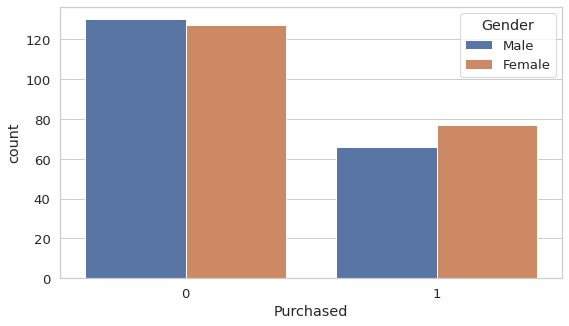

In [ ]:
sns.countplot(x='Purchased', hue='Gender', data=social_N_data)

Age distribution in the dataset

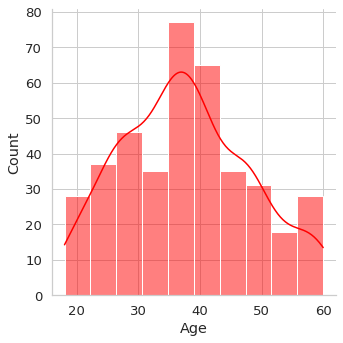

In [ ]:
sns.displot(x='Age', data=social_N_data, color='red', kde=True)

### Cleaning the data

In [ ]:
# drop the User Id column we do not need it
social_N_data.drop('User ID', axis=1, inplace=True)
social_N_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


### categorical data into dummies

In [ ]:
social_N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


The Gender variable is categorical. For the model to work, convert it into dummy variables using the Pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) or the [oneHotEncoder](https://www.machinelearningnuggets.com/python-linear-regression/#encoding-dummy-variables) method.

In [ ]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)
social_N_data.drop('Gender',axis=1,inplace=True)
social_N_data = pd.concat([social_N_data,gender], axis=1)

In [ ]:
social_N_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


### independent(X) and dependent(y) variables

In [ ]:
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male

In [ ]:
y = social_N_data.iloc[:, 2] # Purchased

### Feature scaling

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

### train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


### Fitting the logistic regression model and predicting test results

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression()

Predictions

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
...,...,...
91,0,0
322,0,0
248,0,0
186,0,0


In [ ]:
classifier.coef_

array([[2.36839196, 1.42929561, 0.20973787]])

In [ ]:
classifier.intercept_ 

array([-1.1352347])

### Evaluating the model

In [ ]:
# Using predict_proba
print(classifier.predict_proba(X))

[[9.99305047e-01 6.94953436e-04]
 [9.73650395e-01 2.63496050e-02]
 [9.93938614e-01 6.06138563e-03]
 [9.86425967e-01 1.35740330e-02]
 [9.92449933e-01 7.55006749e-03]
 [9.78634880e-01 2.13651200e-02]
 [9.59015410e-01 4.09845897e-02]
 [3.21160956e-01 6.78839044e-01]
 [9.95160538e-01 4.83946203e-03]
 [8.94774017e-01 1.05225983e-01]
 [9.71990649e-01 2.80093506e-02]
 [9.91181077e-01 8.81892308e-03]
 [9.85694423e-01 1.43055770e-02]
 [9.87533664e-01 1.24663357e-02]
 [9.92255565e-01 7.74443464e-03]
 [9.20459783e-01 7.95402167e-02]
 [6.64896819e-01 3.35103181e-01]
 [7.49443667e-01 2.50556333e-01]
 [6.86862714e-01 3.13137286e-01]
 [6.70546154e-01 3.29453846e-01]
 [7.79633457e-01 2.20366543e-01]
 [5.24342635e-01 4.75657365e-01]
 [4.47060141e-01 5.52939859e-01]
 [8.43313433e-01 1.56686567e-01]
 [7.30142964e-01 2.69857036e-01]
 [7.09930944e-01 2.90069056e-01]
 [5.26688397e-01 4.73311603e-01]
 [7.09899857e-01 2.90100143e-01]
 [9.82040967e-01 1.79590333e-02]
 [9.90032335e-01 9.96766502e-03]
 [9.044789

The first column is the probability that the product is not purchased, and the second column is the probability that the product is purchased.

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[63,  9],
       [14, 34]])

Text(0.5, 18.5, 'Predicted label')

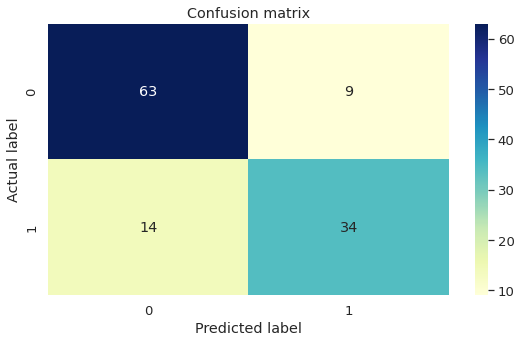

In [ ]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

* 63 TN predictions: zeros predicted correctly.
* 14 FN predictions: ones wrongly predicted as zeros.
* 9 FP predictions: zeros that were wrongly predicted as ones.
* 34 TP predictions: ones predicted correctly.

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy_score(y_test,y_pred)

0.8083333333333333

The accuracy of our model is about 80% which is ideal.

In [ ]:
# Confusion matrix metrics
# classification_report

In [ ]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120



## Where to go from here

Follow us on [LinkedIn](https://www.linkedin.com/company/mlnuggets), [Twitter](https://twitter.com/ml_nuggets), [GitHub](https://github.com/mlnuggets) and subscribe to our [blog](https://www.machinelearningnuggets.com/) so that you don't miss a new issue.